In [1]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("datasets/Train.csv")
df_train.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False
1,22549,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,0,0,0,0,1,0,Politics,Youtube,False
2,7033,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,0,0,0,1,0,0,Personal,Facebook,False
3,21114,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0,Education,Facebook,False
4,23683,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0,Personal,Youtube,False


In [4]:
df_train.shape

(18420, 11)

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18420 non-null  int64 
 1   Data      18420 non-null  object
 2   Love      18420 non-null  int64 
 3   Joy       18420 non-null  int64 
 4   Surprise  18420 non-null  int64 
 5   Anger     18420 non-null  int64 
 6   Sadness   18420 non-null  int64 
 7   Fear      18420 non-null  int64 
 8   Topic     18420 non-null  object
 9   Domain    18420 non-null  object
 10  is_admin  18420 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 1.4+ MB


In [6]:
df_train.describe()

,ID,Love,Joy,Surprise,Anger,Sadness,Fear
count,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000
mean,14080.831650,0.205537,0.451357,0.046037,0.192291,0.248046,0.015147
std,8012.415258,0.404105,0.497642,0.209571,0.394111,0.431890,0.122139
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7271.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14213.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20760.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,28164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_train.columns.tolist()


['ID',
 'Data',
 'Love',
 'Joy',
 'Surprise',
 'Anger',
 'Sadness',
 'Fear',
 'Topic',
 'Domain',
 'is_admin']

In [8]:
df_train.nunique()


ID          18420
Data        18362
Love            2
Joy             2
Surprise        2
Anger           2
Sadness         2
Fear            2
Topic          12
Domain          3
is_admin        2
dtype: int64

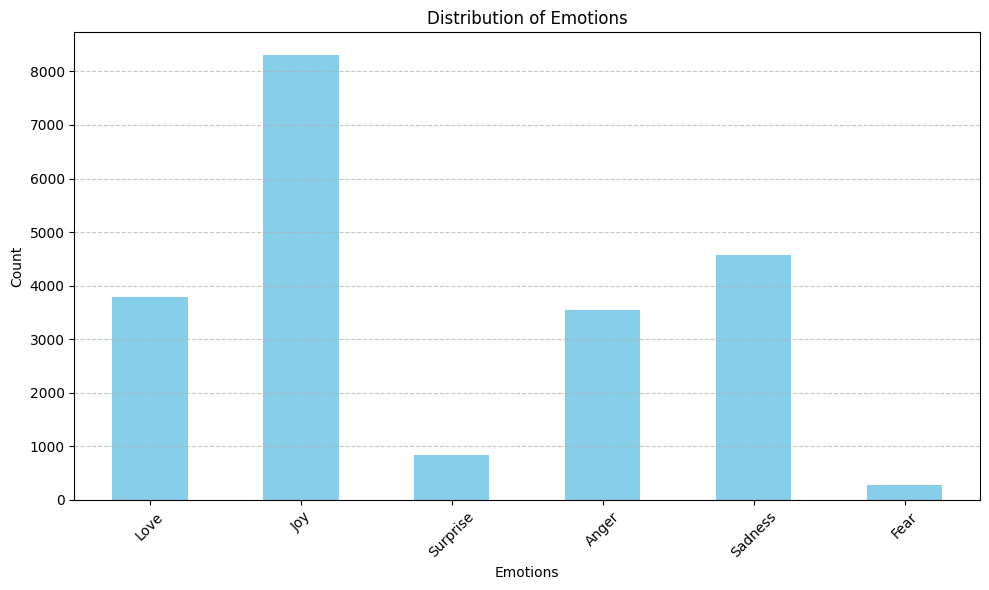

In [9]:
emotion_counts = df_train[['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

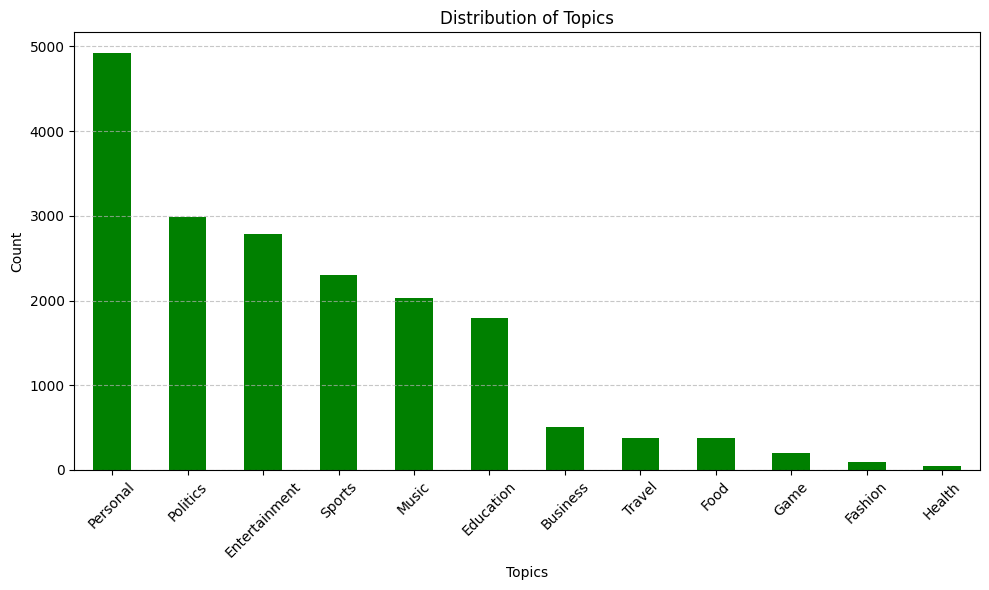

In [10]:
topic_counts = df_train['Topic'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='green')
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
df_test = pd.read_csv("datasets/Test.csv")
df_test.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,46,"তারাই মনে করে ব্রো বলা মানে ট্রল করা।""""- ব্রো""",0,0,0,1,0,0,Sports,Facebook,True
1,5507,আর কিছুই নাই...!! কারণ রাগের আড়ালে লুকিয়ে থাকে,0,0,0,1,0,0,Personal,Facebook,True
2,6424,শালীনতা থাকলে তার প্রতি মন থেকেই সন্মান জাগে। ...,0,1,0,0,0,0,Education,Facebook,True
3,4893,নতুন ইনকাম এর পথ খুলছে। পদদা সেতু কাজ শেষ করতে...,0,0,0,0,1,0,Politics,Youtube,True
4,2188,"মাদরাসার ছাএরা ও পারে বলতে কোনো কথা নাই , ওরা ...",1,0,0,0,0,0,Education,Youtube,True


In [12]:
df_val = pd.read_csv("datasets/Val.csv")
df_val.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,18313,চট্রগ্রাম এবং কক্সবাজার বন্যা কবলিত এলাকাতে ত্...,0,1,0,0,0,0,Business,Facebook,False
1,13039,আমার কাছে ছিল শুধু রিহানের ফটো এলবাম। বছর দুয়ে...,0,0,0,1,0,0,Education,Facebook,False
2,2512,হারিয়ে দেখিয়ে দিলো মাদ্রাসা ছাত্র,0,1,0,0,0,0,Education,Youtube,False
3,14513,তোরা বালছিড়বি কাঙলাচোদার দল।🤣🤣🤣ছোটলোক ভিখারিচ...,0,0,0,0,1,0,Sports,Youtube,False
4,16692,বিপ্লবী সাহসী মেয়ে ...,0,1,0,0,0,0,Politics,Youtube,False


Data Processing

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
# Remove unnecessary columns
columns_to_remove = ['ID', 'Topic', 'Domain', 'is_admin']
df_train_clean = df_train.drop(columns=columns_to_remove)

In [15]:
df_val_clean = df_val.drop(columns=columns_to_remove)


In [16]:
df_test_clean = df_test.drop(columns=columns_to_remove)


In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train = tfidf_vectorizer.fit_transform(df_train_clean['Data'])
X_val = tfidf_vectorizer.transform(df_val_clean['Data'])
X_test = tfidf_vectorizer.transform(df_test_clean['Data'])

In [18]:
y_train = df_train[['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']]
y_val = df_val[['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']]
y_test = df_test_clean[['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']]

Models implementations

Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
y_train_nb = y_train.idxmax(axis=1)  # Get the dominant sentiment label
y_test_nb = y_test.idxmax(axis=1)    # Convert test labels as well

# Naïve Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train_nb)

MultinomialNB()

Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [28]:
y_train_svm = y_train.idxmax(axis=1)  # Get the dominant sentiment label
y_test_svm = y_test.idxmax(axis=1)    # Convert test labels as well

# SVM Classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train_svm)

SVC(kernel='linear', probability=True, random_state=42)